In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as mpatches

pd.set_option('display.max_column', 120)

In [2]:
# to do:
# 0. split data into training and validation and for SHARPs features and my features
# 1. train 10 models on both sides of data
# 2. compute TP, FP, TN, FN for validation data
# 3. compute TSS for all models and compare

In [3]:
df = pd.read_csv("Python/data/no_nan_data.csv")
for i, c in enumerate(df.columns):
    print("\"{}\",".format(c),end=" ")

"HARPNUM", "T_REC", "NOAA_AR", "LAT_FWT", "LON_FWT", "AREA_ACR", "USFLUX", "MEANGAM", "MEANGBT", "MEANGBZ", "MEANGBH", "MEANJZD", "TOTUSJZ", "MEANALP", "MEANJZH", "TOTUSJH", "ABSNJZH", "SAVNCPP", "MEANPOT", "TOTPOT", "MEANSHR", "SHRGT45", "X_flare_in_6h", "M_flare_in_6h", "any_flare_in_6h", "X_flare_in_12h", "M_flare_in_12h", "any_flare_in_12h", "X_flare_in_24h", "M_flare_in_24h", "any_flare_in_24h", "X_flare_in_48h", "M_flare_in_48h", "any_flare_in_48h", "hc_x", "hc_y", "hc_z", "0_nodes_in_component", "0_connected_components_count", "0_total_nodes", "0_mean_distance", "0_flare_in_component", "0_eig_centrality", "1_nodes_in_component", "1_connected_components_count", "1_total_nodes", "1_mean_distance", "1_flare_in_component", "1_eig_centrality", "2_nodes_in_component", "2_connected_components_count", "2_total_nodes", "2_mean_distance", "2_flare_in_component", "2_eig_centrality", "3_nodes_in_component", "3_connected_components_count", "3_total_nodes", "3_mean_distance", "3_flare_in_comp

In [4]:
train, test = train_test_split(df, test_size=0.2, shuffle=False)

In [3]:
prev_features = ["HARPNUM","NOAA_AR","LAT_FWT","LON_FWT","AREA_ACR","USFLUX","MEANGAM","MEANGBT","MEANGBZ",
                 "MEANGBH","MEANJZD","TOTUSJZ","MEANALP","MEANJZH","TOTUSJH","ABSNJZH","SAVNCPP","MEANPOT","TOTPOT",
                 "MEANSHR","SHRGT45"]

new_features = prev_features.copy()
for f in np.append(np.array([str(i) for i in range(10)]),"mean"):
    new_features = np.append(new_features, ["{}_nodes_in_component".format(f), "{}_connected_components_count".format(f), 
                        "{}_total_nodes".format(f), "{}_mean_distance".format(f),
                        "{}_flare_in_component".format(f), "{}_eig_centrality".format(f)])
new_features=np.append(new_features,["hc_lat","hc_lon"])
new_features.flatten()


array(['HARPNUM', 'NOAA_AR', 'LAT_FWT', 'LON_FWT', 'AREA_ACR', 'USFLUX',
       'MEANGAM', 'MEANGBT', 'MEANGBZ', 'MEANGBH', 'MEANJZD', 'TOTUSJZ',
       'MEANALP', 'MEANJZH', 'TOTUSJH', 'ABSNJZH', 'SAVNCPP', 'MEANPOT',
       'TOTPOT', 'MEANSHR', 'SHRGT45', '0_nodes_in_component',
       '0_connected_components_count', '0_total_nodes', '0_mean_distance',
       '0_flare_in_component', '0_eig_centrality', '1_nodes_in_component',
       '1_connected_components_count', '1_total_nodes', '1_mean_distance',
       '1_flare_in_component', '1_eig_centrality', '2_nodes_in_component',
       '2_connected_components_count', '2_total_nodes', '2_mean_distance',
       '2_flare_in_component', '2_eig_centrality', '3_nodes_in_component',
       '3_connected_components_count', '3_total_nodes', '3_mean_distance',
       '3_flare_in_component', '3_eig_centrality', '4_nodes_in_component',
       '4_connected_components_count', '4_total_nodes', '4_mean_distance',
       '4_flare_in_component', '4_eig_centr

In [58]:
def tss(outputs, targets):
    """Return the true skill statistic (TSS)."""
    tn, fp, fn, tp = confusion_matrix(targets, outputs).ravel()
    return (tp / (tp + fn) if tp + fn != 0 else 0) - fp / (fp + tn)

# Each model creates and trains a different model and returns a TSS value. 
def train_and_predict(model,X_train, y_train, X_valid, y_valid):
    model.fit(X_train,y_train)
    output = model.predict(X_valid)
    return tss(output, y_valid)
# To solve: Undersample non-flaring events to match flaring event rate for training. 

In [59]:
# Undersample training data
flare_train = train.loc[train["any_flare_in_24h"] >= 1]
non_flare_train = train.loc[train["any_flare_in_24h"]==0].sample(n=flare_train.shape[0], random_state=222)
new_train=shuffle(flare_train.append(non_flare_train))
new_train.head()

,HARPNUM,T_REC,NOAA_AR,LAT_FWT,LON_FWT,AREA_ACR,USFLUX,MEANGAM,MEANGBT,MEANGBZ,MEANGBH,MEANJZD,TOTUSJZ,MEANALP,MEANJZH,TOTUSJH,ABSNJZH,SAVNCPP,MEANPOT,TOTPOT,MEANSHR,SHRGT45,X_flare_in_6h,M_flare_in_6h,any_flare_in_6h,X_flare_in_12h,M_flare_in_12h,any_flare_in_12h,X_flare_in_24h,M_flare_in_24h,any_flare_in_24h,X_flare_in_48h,M_flare_in_48h,any_flare_in_48h,hc_x,hc_y,hc_z,0_nodes_in_component,0_connected_components_count,0_total_nodes,0_mean_distance,0_flare_in_component,0_eig_centrality,1_nodes_in_component,1_connected_components_count,1_total_nodes,1_mean_distance,1_flare_in_component,1_eig_centrality,2_nodes_in_component,2_connected_components_count,2_total_nodes,2_mean_distance,2_flare_in_component,2_eig_centrality,3_nodes_in_component,3_connected_components_count,3_total_nodes,3_mean_distance,3_flare_in_component,3_eig_centrality,4_nodes_in_component,4_connected_components_count,4_total_nodes,4_mean_distance,4_flare_in_component,4_eig_centrality,5_nodes_in_component,5_connected_components_count,5_total_nodes,5_mean_distance,5_flare_in_component,5_eig_centrality,6_nodes_in_component,6_connected_components_count,6_total_nodes,6_mean_distance,6_flare_in_component,6_eig_centrality,7_nodes_in_component,7_connected_components_count,7_total_nodes,7_mean_distance,7_flare_in_component,7_eig_centrality,8_nodes_in_component,8_connected_components_count,8_total_nodes,8_mean_distance,8_flare_in_component,8_eig_centrality,9_nodes_in_component,9_connected_components_count,9_total_nodes,9_mean_distance,9_flare_in_component,9_eig_centrality,mean_nodes_in_component,mean_connected_components_count,mean_total_nodes,mean_mean_distance,mean_flare_in_component,mean_eig_centrality,0_centrality_ratio,1_centrality_ratio,2_centrality_ratio,3_centrality_ratio,4_centrality_ratio,5_centrality_ratio,6_centrality_ratio,7_centrality_ratio,8_centrality_ratio,9_centrality_ratio,mean_centrality_ratio,hc_lat,hc_lon
95882,2069,2012-10-01 13:00:00,11582,-15.129914,-13.715803,956.477966,1.976851e+22,50.793,88.592,91.062,50.642,0.179142,2.390830e+13,0.014678,0.008203,1138.196,234.057,4.478067e+12,15460.860,5.858392e+23,43.448,43.628,0,0,0,0,0,0,0,0,0,0,0,0,-159192.861010,-256189.641790,626702.384316,0.0,0.0,0.0,0.0,0,0.00000,0.0,0.0,0.0,0.000000,0,0.00000,0.0,0.0,0.0,0.000000,0,0.00000,0.0,0.0,0.0,0.000000,0,0.00000,0.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,0.0,0.00000,0,0.000000,0.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,0.0,0.000000,0,0.000000,2.0,1.0,4.0,50.438069,0,0.577350,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.288675,-15.129914,78.942427
53623,1090,2011-11-17 01:00:00,11359,15.929120,-56.882786,67.843414,3.025852e+21,23.102,83.850,83.544,30.574,-0.549904,2.991237e+12,0.018897,0.005154,138.768,24.074,1.321302e+12,1238.141,7.680552e+21,19.608,0.107,0,0,0,0,0,0,0,0,0,0,0,0,-560158.069141,173693.930545,373877.966898,0.0,0.0,0.0,0.0,0,0.00000,0.0,0.0,0.0,0.000000,0,0.00000,0.0,0.0,0.0,0.000000,0,0.00000,0.0,0.0,0.0,0.000000,0,0.00000,0.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,0.0,0.00000,0,0.000000,0.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,0.0,0.000000,0,0.000000,7.0,1.0,12.0,72.965942,0,0.343371,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049053,15.929120,293.259337
31588,667,2011-06-14 03:00:00,11236,16.654531,-81.442917,851.830200,1.602938e+22,46.163,56.310,69.959,30.801,-0.056263,1.289996e+13,-0.002790,-0.001271,921.572,29.440,3.267328e+12,10017.530,3.080743e+23,40.386,38.576,0,0,0,0,0,0,0,1,1,0,1,1,-658914.076071,197819.936202,102131.734837,1.0,1.0,3.0,0.0,0,0.57735,1.0,1.0,3.0,8.233342,0,0.57735,1.0,1.0,3.0,16.466684,0,0.57735,1.0,1.0,3.0,24.700026,0,0.57735,1.0,1.0,3.0,32.933368,0,0.000003,1.0,1.0,3.0,41.16671,0,0.000003,1.0,1.0,3.0,49.400052,0,0.000003,1.0,1.0,3.0,57.633394,0,0.000003,1.0,1.0,3.0,65.866737,0,0.000003,1.0,1.0,3.0,74.100079,0,0.0000

In [66]:
def test_feature_sets(prev_names, new_names):
    layers = [(20,20,20), (100,100),(50,50,50,50),(600),(500,500)]
    for j in layers:
        model = MLPClassifier(j, learning_rate = 'adaptive',tol=0.0000000000001)

        # Train 20 models and output average of each score
        old_sum = 0
        new_sum = 0
        for i in range(20):
            old_model = train_and_predict(model, new_train.loc[:,prev_names], new_train.loc[:,"any_flare_in_24h"], 
                                    test.loc[:,prev_names], test.loc[:,"any_flare_in_24h"])
            new_model = train_and_predict(model, new_train.loc[:,new_names], new_train.loc[:, "any_flare_in_24h"],
                                     test.loc[:,new_names], test.loc[:, "any_flare_in_24h"])
            old_sum += old_model
            new_sum += new_model
        print("-----------------")
        print("For layers: {}".format(j))
        print("Average old: {}".format(old_sum/20))
        print("Average new: {}".format(new_sum/20))

In [67]:
# Using entire feature set
test_feature_sets(prev_features, new_features)

-----------------
For layers: (20, 20, 20)
Average old: 0.35010464004144204
Average new: 0.336688462473422
-----------------
For layers: (100, 100)
Average old: 0.3186280371619434
Average new: 0.331499903401027
-----------------
For layers: (50, 50, 50, 50)
Average old: 0.3564029262588916
Average new: 0.29043011356217735
-----------------
For layers: 600
Average old: 0.28316305773964767
Average new: 0.27584888337956287
-----------------
For layers: (500, 500)
Average old: 0.24943815356901364
Average new: 0.34763353083046444


In [4]:
top_half = np.array(["9_eig_centrality","8_eig_centrality","7_eig_centrality","6_eig_centrality","9_connected_components_count","8_connected_components_count","7_connected_components_count","6_connected_components_count","5_connected_components_count","4_connected_components_count","3_connected_components_count","2_eig_centrality","2_centrality_ratio","5_eig_centrality","3_nodes_in_component","6_centrality_ratio","5_centrality_ratio","4_centrality_ratio","4_eig_centrality","7_centrality_ratio","9_nodes_in_component","3_total_nodes","5_nodes_in_component","7_nodes_in_component","9_total_nodes","8_total_nodes","7_total_nodes","6_total_nodes","5_total_nodes","4_total_nodes","6_nodes_in_component","8_nodes_in_component","4_nodes_in_component","8_centrality_ratio","9_centrality_ratio","3_mean_distance","4_mean_distance","5_mean_distance","6_mean_distance","7_mean_distance","8_mean_distance","9_mean_distance","3_centrality_ratio","3_eig_centrality"])
top_half = np.append(top_half,prev_features)
top_half.flatten()


array(['9_eig_centrality', '8_eig_centrality', '7_eig_centrality',
       '6_eig_centrality', '9_connected_components_count',
       '8_connected_components_count', '7_connected_components_count',
       '6_connected_components_count', '5_connected_components_count',
       '4_connected_components_count', '3_connected_components_count',
       '2_eig_centrality', '2_centrality_ratio', '5_eig_centrality',
       '3_nodes_in_component', '6_centrality_ratio', '5_centrality_ratio',
       '4_centrality_ratio', '4_eig_centrality', '7_centrality_ratio',
       '9_nodes_in_component', '3_total_nodes', '5_nodes_in_component',
       '7_nodes_in_component', '9_total_nodes', '8_total_nodes',
       '7_total_nodes', '6_total_nodes', '5_total_nodes', '4_total_nodes',
       '6_nodes_in_component', '8_nodes_in_component',
       '4_nodes_in_component', '8_centrality_ratio', '9_centrality_ratio',
       '3_mean_distance', '4_mean_distance', '5_mean_distance',
       '6_mean_distance', '7_mean_distan

In [77]:
test_feature_sets(prev_features, top_half)

-----------------
For layers: (20, 20, 20)
Average old: 0.34147250007696067
Average new: 0.33163479033245974
-----------------
For layers: (100, 100)
Average old: 0.3443070562896017
Average new: 0.34736535589290884
-----------------
For layers: (50, 50, 50, 50)
Average old: 0.30157075503243497
Average new: 0.3112382555286989
-----------------
For layers: 600
Average old: 0.2673459511761191
Average new: 0.34771353017231765
-----------------
For layers: (500, 500)
Average old: 0.3569893603131081
Average new: 0.3610148372307304


In [78]:
top_10 = np.array(["9_eig_centrality","8_eig_centrality","7_eig_centrality","6_eig_centrality","9_connected_components_count","8_connected_components_count","7_connected_components_count","6_connected_components_count","5_connected_components_count","4_connected_components_count"])

top_10 = np.append(top_10,prev_features)
top_10.flatten()

array(['9_eig_centrality', '8_eig_centrality', '7_eig_centrality',
       '6_eig_centrality', '9_connected_components_count',
       '8_connected_components_count', '7_connected_components_count',
       '6_connected_components_count', '5_connected_components_count',
       '4_connected_components_count', 'HARPNUM', 'NOAA_AR', 'LAT_FWT',
       'LON_FWT', 'AREA_ACR', 'USFLUX', 'MEANGAM', 'MEANGBT', 'MEANGBZ',
       'MEANGBH', 'MEANJZD', 'TOTUSJZ', 'MEANALP', 'MEANJZH', 'TOTUSJH',
       'ABSNJZH', 'SAVNCPP', 'MEANPOT', 'TOTPOT', 'MEANSHR', 'SHRGT45'],
      dtype='<U28')

In [79]:
test_feature_sets(prev_features, top_10)

-----------------
For layers: (20, 20, 20)
Average old: 0.3817078366713054
Average new: 0.3482472527676667
-----------------
For layers: (100, 100)
Average old: 0.41048372201150907
Average new: 0.31672520325591613
-----------------
For layers: (50, 50, 50, 50)
Average old: 0.23368975435199596
Average new: 0.2940145126687962
-----------------
For layers: 600
Average old: 0.390843319650248
Average new: 0.26090191064276536
-----------------
For layers: (500, 500)
Average old: 0.30219906633377164
Average new: 0.3936988675628079


['(20, 20, 20)', '(100, 100)', '(50, 50, 50, 50)', '600', '(500,500)']
35


(0, 0.5)

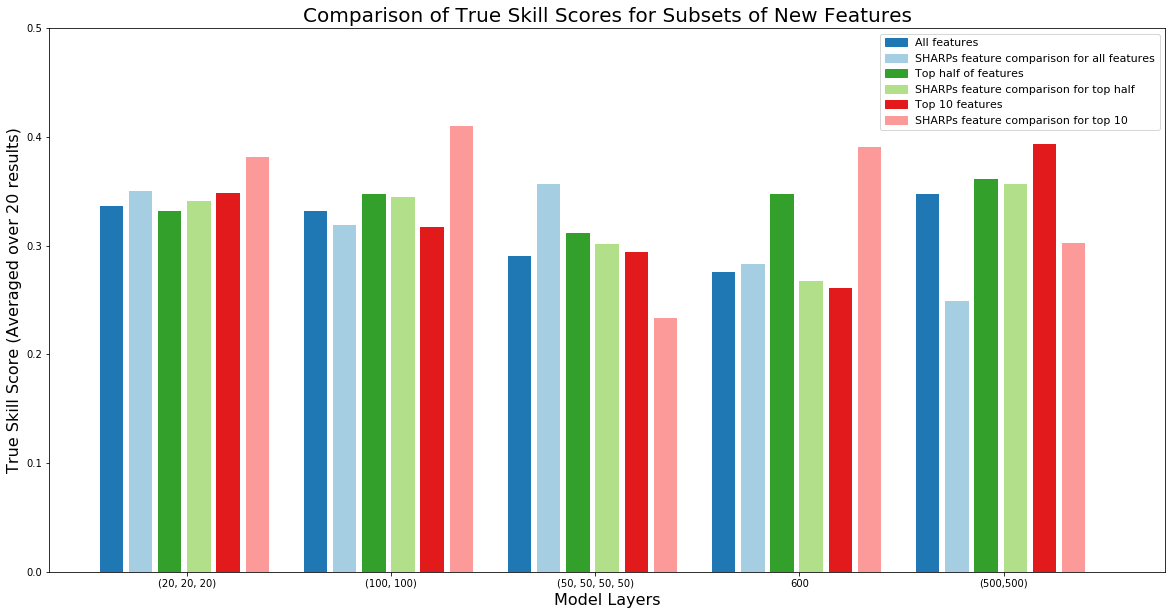

In [16]:
labels = ["(20, 20, 20)", "(100, 100)", "(50, 50, 50, 50)", "600", "(500,500)"]
# labels = ['', '', '', labels[0], '','', '', '', '', '', labels[1],'', '', '', '', '', '', labels[2],
#           '', '', '', '', '', '',labels[3],  '', '', '', '', '', '',labels[4],  '', '', '']

tick_ind = [3,10,17,24,31]
print(labels)
x_vals = [i for i in range(0,5*6+5)]

new_all = [0.336688462473422, 0.331499903401027, 0.29043011356217735,0.27584888337956287,0.34763353083046444]
old_all = [0.35010464004144204,0.3186280371619434, 0.3564029262588916,0.28316305773964767,0.24943815356901364]

new_half = [0.33163479033245974, 0.34736535589290884, 0.3112382555286989,0.34771353017231765,0.3610148372307304]
old_half = [0.34147250007696067, 0.3443070562896017, 0.30157075503243497, 0.2673459511761191, 0.3569893603131081]

new_10 = [0.3482472527676667, 0.31672520325591613, 0.2940145126687962, 0.26090191064276536, 0.3936988675628079]
old_10 = [0.3817078366713054, 0.41048372201150907, 0.23368975435199596, 0.390843319650248, 0.30219906633377164]

y = np.array([[new_all[i], old_all[i], new_half[i], old_half[i],new_10[i], old_10[i],0] for i in range(len(new_all))])
# plt.bar()
y = y.flatten()
colors = ['#1f78b4','#a6cee3','#33a02c','#b2df8a','#e31a1c','#fb9a99', '#000000']

plt.figure(figsize=(20,10))
print(len(x_vals))
plt.bar(x_vals, y, align='edge', color=colors)
plt.xticks(tick_ind, labels)
plt.xlabel("Model Layers", {"size":"16"})
plt.ylabel("True Skill Score (Averaged over 20 results)", {"size":"16"})
plt.title("Comparison of True Skill Scores for Subsets of New Features", {'size':'20'})
legend_data = [mpatches.Patch(color='#1f78b4', label='All features'),
               mpatches.Patch(color='#a6cee3', label='SHARPs feature comparison for all features'),
               mpatches.Patch(color='#33a02c', label='Top half of features'),
               mpatches.Patch(color='#b2df8a', label='SHARPs feature comparison for top half'),
               mpatches.Patch(color='#e31a1c', label='Top 10 features'),
               mpatches.Patch(color='#fb9a99', label='SHARPs feature comparison for top 10')]
               
plt.legend(handles=legend_data, prop={"size":"11"}, loc=1)
plt.ylim((0, 0.5))